## The following is the workflow used for exploratory data analysis to find any correlation between news sentiment and market returns

In [22]:
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [23]:
# Read the CSV file
df_btc = pd.read_csv('csv_files/BTC-USD.csv')

df_btc['Date'] = pd.to_datetime(df_btc['Date'])  # Convert the 'Date' column to datetime objects
df_btc.set_index('Date', inplace=True)  # Set the 'Date' column as the DataFrame index
df_btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709
2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367
2024-04-04,65975.695313,69291.257813,65113.796875,68508.843750,68508.843750,34439527442


In [24]:
df_news = pd.read_csv('csv_files/bitcoin_news_data_sentiment_finbert.csv')
df_news['Date'] = pd.to_datetime(df_news['Date'])  # Convert the 'Date' column to datetime objects
df_news['Date'] = df_news['Date'].dt.date # Removing time component
# df_news.set_index('Date', inplace=True)  # Set the 'Date' column as the DataFrame index
df_news.drop_duplicates(subset=['Title'], keep='first')
df_news_original = df_news.copy()
df_news

,Date,Title,Sentiment
0,2014-02-09,Bitcoin's future depends on public acceptance ...,neutral
1,2014-02-09,Armory to Match 10 BTC in Donations to Hal Fin...,positive
2,2014-01-09,Finnish Investor Plans to Turn Estonian Castle...,neutral
3,2014-02-09,Hal Finney – We Salute You - Bitcoin Magazine,neutral
4,2014-01-09,Salaries paid in bitcoin a growing trend in Ca...,positive
...,...,...,...
132456,2024-11-04,Wintermute sees positive prospects for Bitcoin...,positive
132457,2024-12-04,Venezuelan Probe Unveils Crypto Money Launderi...,negative
132458,2024-11-04,Crypto at the Capitol: Legislature revisiting ...,negative
132459,2024-12-04,El Salvador's newest Hilton hotel to tap into ...,neutral


In [25]:
# Count values in the 'Sentiment' column
sentiment_counts = df_news['Sentiment'].value_counts()

# Print the result
print(sentiment_counts)

neutral     65475
negative    35047
positive    31939
Name: Sentiment, dtype: int64


In [26]:
# Dropping the 'neutral' because its making the distribution staggered towards neutral
df_news = df_news[df_news['Sentiment'] != 'neutral']
df_news

,Date,Title,Sentiment
1,2014-02-09,Armory to Match 10 BTC in Donations to Hal Fin...,positive
4,2014-01-09,Salaries paid in bitcoin a growing trend in Ca...,positive
5,2014-01-09,Former Bitcoin coder and ALS patient is now be...,negative
6,2014-02-09,BitInstant founder Charlie Shrem says bitcoin ...,negative
15,2014-02-09,Armory to Match 10 BTC in Donations to Hal Fin...,positive
...,...,...,...
132450,2024-12-04,Ordinal Activity Ramps Pre-Halving with Bitcoi...,positive
132451,2024-11-04,How Bitcoin Halving Influences Price and Inves...,negative
132456,2024-11-04,Wintermute sees positive prospects for Bitcoin...,positive
132457,2024-12-04,Venezuelan Probe Unveils Crypto Money Launderi...,negative


In [28]:
def get_mode(x):
    return mode(x).mode[0] if len(x) > 0 else None

df_news = df_news.drop(columns='Title')
df_news = df_news.groupby('Date').agg({'Sentiment': get_mode}).reset_index()

df_news

,Date,Sentiment
0,2014-01-09,negative
1,2014-01-10,positive
2,2014-01-12,positive
3,2014-02-09,negative
4,2014-02-11,positive
...,...,...
3333,2024-11-04,positive
3334,2024-12-01,positive
3335,2024-12-02,positive
3336,2024-12-03,positive


In [29]:
# Count values in the 'Sentiment' column
sentiment_counts = df_news['Sentiment'].value_counts()

# Print the result
print(sentiment_counts)

negative    1972
positive    1366
Name: Sentiment, dtype: int64


In [31]:
df_news.set_index('Date', inplace=True)
df = df_btc.join(df_news, how='left').fillna('neutral')
df

,Open,High,Low,Close,Adj Close,Volume,Sentiment
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,positive
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,positive
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,negative
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,negative
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,neutral
...,...,...,...,...,...,...,...
2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709,positive
2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367,positive
2024-04-04,65975.695313,69291.257813,65113.796875,68508.843750,68508.843750,34439527442,positive


In [32]:
# Define a dictionary for the replacements
replacements = {
    'positive': +1,
    'negative': -1,
    'neutral': 0
}
df['Sentiment'] = df['Sentiment'].replace(replacements)
df

,Open,High,Low,Close,Adj Close,Volume,Sentiment
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,1
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,1
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-1
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,-1
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0
...,...,...,...,...,...,...,...
2024-04-02,69705.023438,69708.382813,64586.593750,65446.972656,65446.972656,50705240709,1
2024-04-03,65446.671875,66914.320313,64559.898438,65980.812500,65980.812500,34488018367,1
2024-04-04,65975.695313,69291.257813,65113.796875,68508.843750,68508.843750,34439527442,1


In [33]:
df.to_csv('csv_files/btc_usd_sentiment.csv', index=True, encoding='utf-8')

##### Intuitive analysis

In [34]:
df_original = df.copy()

In [35]:
#Computing the return
df['ret_curr'] = df['Open'].pct_change(periods=1).fillna(0)
#Computing the event return
df['eventRet'] = df['ret_curr'] + df['ret_curr'].shift(-1) + df['ret_curr'].shift(1)
# df.reset_index(level=0, inplace=True)
df['Sentiment_lag1'] = df['Sentiment'].shift(1) # we know news one day before
df['Sentiment_lag2'] = df['Sentiment'].shift(2) # we know news two day before
df['Sentiment_lag3'] = df['Sentiment'].shift(3) # we know news three day before
df = df.drop(columns=['High','Low', 'Close', 'Adj Close', 'Volume', 'Sentiment']).dropna()
df

,Open,ret_curr,eventRet,Sentiment_lag1,Sentiment_lag2,Sentiment_lag3
Date,,,,,,
2014-09-20,394.673004,-0.069394,-0.107111,-1.0,1.0,1.0
2014-09-21,408.084991,0.033983,-0.057428,-1.0,-1.0,1.0
2014-09-22,399.100006,-0.022017,0.019462,0.0,-1.0,-1.0
2014-09-23,402.092010,0.007497,0.069189,-1.0,0.0,-1.0
2014-09-24,435.751007,0.083710,0.062302,-1.0,-1.0,0.0
...,...,...,...,...,...,...
2024-04-01,71333.484375,0.024203,-0.002140,1.0,1.0,1.0
2024-04-02,69705.023438,-0.022829,-0.059717,-1.0,1.0,1.0
2024-04-03,65446.671875,-0.061091,-0.075837,1.0,-1.0,1.0


In [36]:
# Calculate the means for each sentiment lag group
mean_values_lag1 = df.groupby(df['Sentiment_lag1'])['ret_curr'].mean()
mean_values_lag2 = df.groupby(df['Sentiment_lag2'])['ret_curr'].mean()
mean_values_lag3 = df.groupby(df['Sentiment_lag3'])['ret_curr'].mean()

print('Sentiment lag 1 correlation')
print(mean_values_lag1)

print('Sentiment lag 2 correlation')
print(mean_values_lag2)

print('Sentiment lag 3 correlation')
print(mean_values_lag3)


Sentiment lag 1 correlation
Sentiment_lag1
-1.0   -0.000450
 0.0    0.001780
 1.0    0.006003
Name: ret_curr, dtype: float64
Sentiment lag 2 correlation
Sentiment_lag2
-1.0    0.002170
 0.0    0.002033
 1.0    0.002111
Name: ret_curr, dtype: float64
Sentiment lag 3 correlation
Sentiment_lag3
-1.0    0.002283
 0.0    0.002174
 1.0    0.001922
Name: ret_curr, dtype: float64


Sentiment of news with one day before seems to have linear relation with the current day return, although its very less. Plots are shown below.

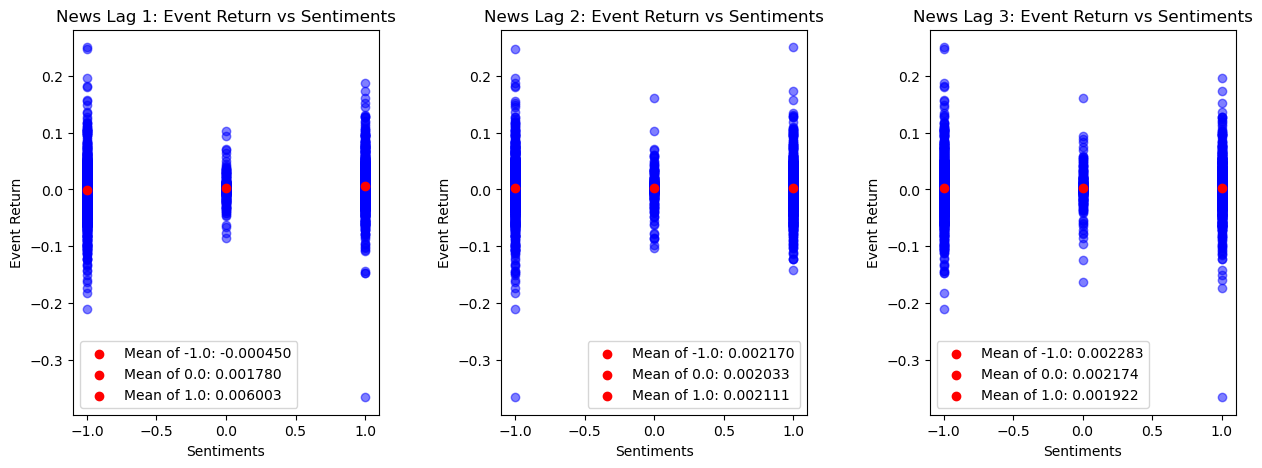

In [37]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Adjust space between matplotlib subplots
plt.subplots_adjust(wspace=0.4)

# Define a function to plot scatter and horizontal lines for mean
def plot_scatter_and_mean_lines(ax, x, y, title, xlabel, ylabel, mean_values, color='blue'):
    # Scatter plot
    ax.scatter(x, y, alpha=0.5, color=color)
    # Plot horizontal lines for the mean values of -1, 0, and +1 sentiments
    for sentiment, mean in mean_values.iteritems():
        ax.scatter(sentiment, mean, color='red', label=f'Mean of {sentiment}: {mean:.6f}')

    # Title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

# Plot for Group A
plot_scatter_and_mean_lines(
    axes[0], df['Sentiment_lag1'], df['ret_curr'],
    'News Lag 1: Event Return vs Sentiments',
    'Sentiments', 'Event Return', mean_values_lag1
)

# Plot for Group B
plot_scatter_and_mean_lines(
    axes[1], df['Sentiment_lag2'], df['ret_curr'],
    'News Lag 2: Event Return vs Sentiments',
    'Sentiments', 'Event Return', mean_values_lag2
)

# Plot for Group C
plot_scatter_and_mean_lines(
    axes[2], df['Sentiment_lag3'], df['ret_curr'],
    'News Lag 3: Event Return vs Sentiments',
    'Sentiments', 'Event Return', mean_values_lag3
)

# Display the plot
plt.show()



Colclusions:
1. The plot above shows that there is a linear relation between 1 day prior news sentiment and the current day market returns.
2. Although the relationship is very minor, but we will sentiment as a technical feature in our machine learning workflow to enchance our algorithmic trading strategy.
3. No conclusion can be drawn on 2 and 3 days news relations with the current day returns.